In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
%matplotlib inline

In [2]:
df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/ercot/houston_train_data_covid_42days_component.csv', parse_dates=['date'])

In [4]:
df.head()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,LocalLinearTrend,Dynamic,full_time_coefficients,completely_coefficients,Restaurant_coefficients
0,1,2019-01-01,236041.7,12.903333,8434,203229,120296,238859,359155,243141.317235,-6569.853051,0.504493,-0.053101,-0.000275
1,2,2019-01-02,259888.8,11.837083,27204,202020,161380,351478,512858,244464.816565,14955.112912,0.526348,0.002829,0.000402
2,3,2019-01-03,267176.1,9.215417,26746,189495,184590,394976,579566,245331.423772,21674.073403,0.534213,0.038283,0.000713
3,4,2019-01-04,269066.7,9.046667,25071,162564,226151,462677,688828,245451.061785,21382.385411,0.545033,0.044543,0.002108
4,5,2019-01-05,239342.6,12.323750,11582,179923,209522,416688,626210,243795.683855,-3602.823208,0.525859,-0.051434,-0.002096


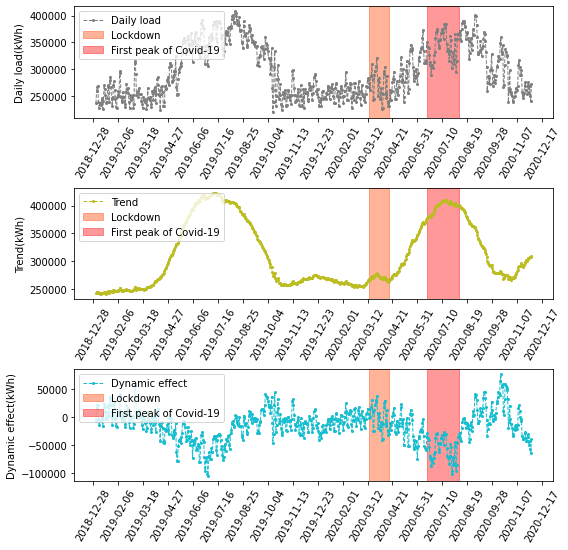

In [14]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(3, 1, 1)
ax.plot(df['date'], df['total_load'], lw=1, label="Daily load", c=c8,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(3, 1, 2)
ax.plot(df['date'], df['LocalLinearTrend'], lw=1, label="Trend", c=c9,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Trend(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(3, 1, 3)
ax.plot(df['date'], df['Dynamic'], lw=1, label="Dynamic effect", c=c10,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Dynamic effect(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

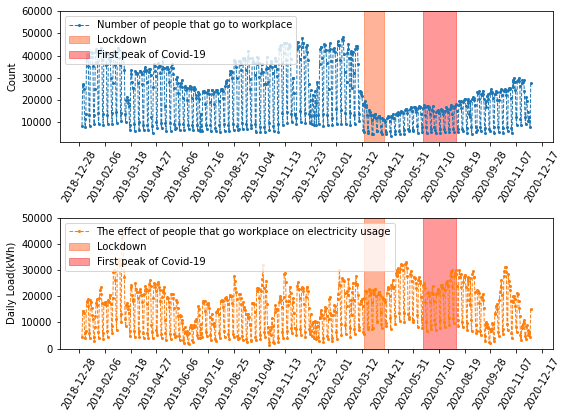

In [15]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['full_time_work_behavior_devices'], lw=1, label="Number of people that go to workplace", c=c1,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([1000, 60000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['full_time_coefficients']*df['full_time_work_behavior_devices'], lw=1, label="The effect of people that go workplace on electricity usage", c=c2,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily Load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 50000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

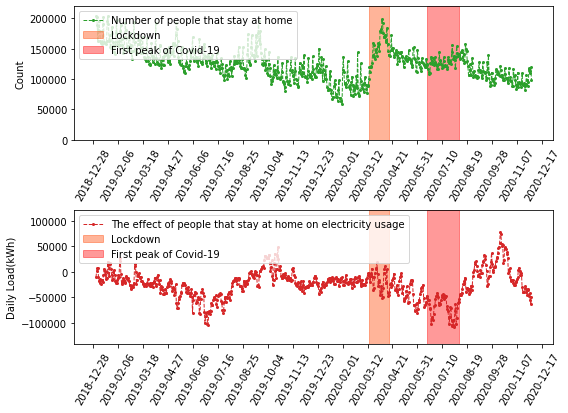

In [16]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['completely_home_device_count'], lw=1, label="Number of people that stay at home", c=c3,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 220000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['completely_home_device_count']*df['completely_coefficients'], lw=1, label="The effect of people that stay at home on electricity usage", c=c4,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')

ax.set_ylabel("Daily Load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-140000, 120000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

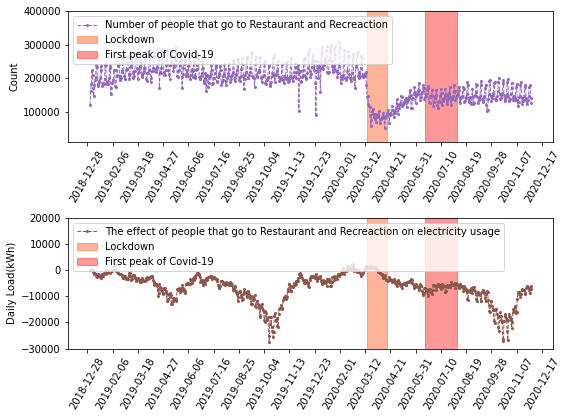

In [17]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Restaurant_Recreaction'], lw=1, label="Number of people that go to Restaurant and Recreaction", c=c5,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([10000, 400000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Restaurant_Recreaction']*df['Restaurant_coefficients'], lw=1, label="The effect of people that go to Restaurant and Recreaction on electricity usage", c=c6,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-15', '2020-04-15', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-06-15', '2020-08-05', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily Load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-30000, 20000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()